In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
women_data = pd.read_csv("./.kaggle_data/Rdatasets/women.csv").drop("Unnamed: 0",axis=1)
women_data.head()

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


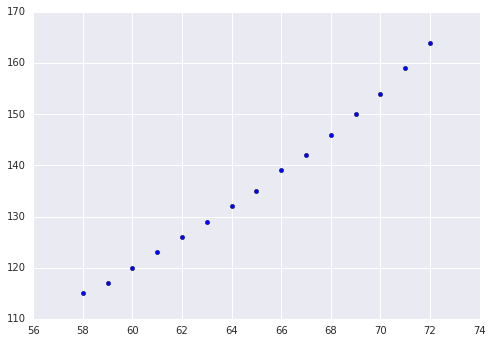

In [4]:
plt.scatter(women_data["height"],women_data["weight"])
plt.show()

In [5]:
import pymc3 as mc

In [6]:
linear_regression = mc.Model()

In [7]:
with linear_regression:
    alpha = mc.Normal('alpha',mu=(-130),sd=25)
    beta = mc.Normal('beta',mu=0,sd=10)
    sigma = mc.HalfNormal('sigma',sd=1)
    mu = alpha + beta * women_data["height"].values
    wieght_obs = mc.Normal('weight_obs',mu=mu,sd=sigma,observed=women_data["weight"].values)

Applied log-transform to sigma and added transformed sigma_log to model.


In [8]:
with linear_regression:
    start = mc.find_MAP(model=linear_regression)
    step = mc.NUTS(scaling=start)
    trace = mc.sample(2000,step,start=start)

 [-----------------100%-----------------] 2000 of 2000 complete in 5.3 sec

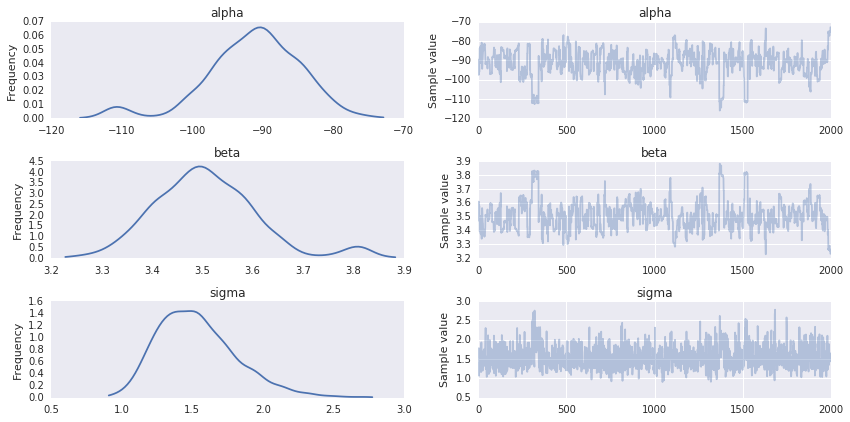

In [9]:
mc.traceplot(trace)
plt.show()